In [1]:
import utility_functions as utils
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk

plt.style.use('ggplot')

importlib.reload(utils)

data = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Audio/test.json'

/Users/borosabel/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = utils.get_all_artist_lyrics(data)

In [3]:
df['Lyrics'] = df['Lyrics'].apply(utils.cleanup)

In [6]:
with open('corpus.tsv', 'w', encoding='utf-8') as file:
    for lyrics in df['Lyrics']:
        if pd.notna(lyrics):  # Check if the lyrics data is not NaN
            file.write(lyrics + '\n')

In [4]:
exmaple = df['Lyrics'][50]
print(exmaple)

boom yeah the world mash up well things get hectic quick from the satellite dish to yeahr joy stick it's the night of the living cable box wires coming up from around the block remote control to change the station but that won't change yeahr situation have yeah seen what i mean i'm the little gnome that's in yeahr dreams so i say this rhyme built by design to take yeah beyeahnd space and time said who is the man making diamonds out of coal the man pushing buttons on remote control remote control remote control until yeahr back's up against the wall yeah never know yeahrself that much at all so yeah've got to share yeahr love with a friend that's all that yeah've got left in the end living in this city of pure confusion people misled by their own illusion all this action no satisfaction we're all linked together like a chain reaction play or fold love is bold what is the future that will unfold some like it hot others like it cold but we all want to hold the remote control remote contro

In [5]:
tokens = nltk.word_tokenize(exmaple)

In [6]:
tagged = nltk.pos_tag(tokens)

In [7]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  boom/NN
  yeah/VBZ
  the/DT
  world/NN
  mash/NN
  up/RB
  well/RB
  things/NNS
  get/VBP
  hectic/JJ
  quick/NN
  from/IN
  the/DT
  satellite/JJ
  dish/NN
  to/TO
  yeahr/VB
  joy/NN
  stick/NN
  it/PRP
  's/VBZ
  the/DT
  night/NN
  of/IN
  the/DT
  living/NN
  cable/NN
  box/NN
  wires/NNS
  coming/VBG
  up/RP
  from/IN
  around/IN
  the/DT
  block/NN
  remote/VB
  control/NN
  to/TO
  change/VB
  the/DT
  station/NN
  but/CC
  that/DT
  wo/MD
  n't/RB
  change/VB
  yeahr/JJR
  situation/NN
  have/VBP
  yeah/VBN
  seen/VBN
  what/WP
  i/JJ
  mean/VBP
  i/JJ
  'm/VBP
  the/DT
  little/JJ
  gnome/NN
  that/WDT
  's/VBZ
  in/IN
  yeahr/JJ
  dreams/NNS
  so/IN
  i/JJ
  say/VBP
  this/DT
  rhyme/NN
  built/VBN
  by/IN
  design/NN
  to/TO
  take/VB
  yeah/NN
  beyeahnd/NN
  space/NN
  and/CC
  time/NN
  said/VBD
  who/WP
  is/VBZ
  the/DT
  man/NN
  making/VBG
  diamonds/NNS
  out/IN
  of/IN
  coal/NN
  the/DT
  man/NN
  pushing/VBG
  buttons/NNS
  on/IN
  remote/NN
  control/NN
  r

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [9]:
sentiment_score = {} 

for index, row in df.iterrows():
    text = row['Lyrics']
    sentiment_score[index] = sia.polarity_scores(text)

In [10]:
vaders = pd.DataFrame(sentiment_score).T
result = pd.concat([vaders, df], axis=1)

In [11]:
result

,neg,neu,pos,compound,Artist,Album,Album Release Year,Song,Lyrics
0,0.189,0.724,0.088,-0.9947,big_l,Lifestylez Ov Da Poor and Dangerous (1995),1995,Fed_Up_With_the_Bullshit,yeah on the scene is the brother that's big i'...
1,0.215,0.666,0.119,-0.9981,big_l,Lifestylez Ov Da Poor and Dangerous (1995),1995,All_Black,yeah once again it's the big l that kid who go...
2,0.106,0.740,0.154,0.9834,big_l,Lifestylez Ov Da Poor and Dangerous (1995),1995,Street_Struck,yeah it's the big l comin at yeah once again i...
3,0.085,0.734,0.181,0.9845,big_l,Lifestylez Ov Da Poor and Dangerous (1995),1995,M_V_P_,a yeah spark up the phillies and pass the stou...
4,0.124,0.574,0.302,0.9987,big_l,Lifestylez Ov Da Poor and Dangerous (1995),1995,No_Endz__No_Skinz,let me get to the point real quick when yeah p...
...,...,...,...,...,...,...,...,...,...
1525,0.215,0.722,0.062,-0.9965,mack_10,Mack 10 (1995),1995,Wanted_Dead,on a high speed chase they recognize my plates...
1526,0.149,0.705,0.146,-0.9377,mack_10,Mack 10 (1995),1995,H_O_E_K,oh shake yeahr ass k dee bayby he's hard on hi...
1527,0.177,0.665,0.158,-0.9880,mack_10,Mack 10 (1995),1995,Westside_Slaughterhouse,microphone check i o from the west coast belle...
1528,0.117,0.749,0.134,0.1270,mack_10,Mack 10 (1995),1995,On_Them_Thangs,when in the streets i keep my heat on my seat ...


In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

/Users/borosabel/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/borosabel/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [13]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/borosabel/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [14]:
encoded_text = tokenizer(exmaple, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

{'roberta_neg': 0.23839454, 'roberta_neu': 0.6249449, 'roberta_pos': 0.13666053}


In [27]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    # encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [28]:
sentiment_score_vader = {}
sentiment_score_roberta = {}

for index, row in df.iterrows():
    # try:
    text = row['Lyrics']
        # sentiment_score_vader[index] = sia.polarity_scores(text)
    sentiment_score_roberta[index] = polarity_scores_roberta(text)
    # except RuntimeError:
    #     print(f'Broke for index {index}')

In [29]:
sentiment_score_roberta

{0: {'roberta_neg': 0.95352626,
  'roberta_neu': 0.043075614,
  'roberta_pos': 0.0033981067},
 1: {'roberta_neg': 0.78694683,
  'roberta_neu': 0.19934906,
  'roberta_pos': 0.013704042},
 2: {'roberta_neg': 0.3963947,
  'roberta_neu': 0.5091274,
  'roberta_pos': 0.0944779},
 3: {'roberta_neg': 0.22112189,
  'roberta_neu': 0.6334303,
  'roberta_pos': 0.14544779},
 4: {'roberta_neg': 0.48758107,
  'roberta_neu': 0.4585722,
  'roberta_pos': 0.053846736},
 5: {'roberta_neg': 0.41771537,
  'roberta_neu': 0.5126924,
  'roberta_pos': 0.06959221},
 6: {'roberta_neg': 0.593135,
  'roberta_neu': 0.36732048,
  'roberta_pos': 0.03954447},
 7: {'roberta_neg': 0.29197147,
  'roberta_neu': 0.6155737,
  'roberta_pos': 0.09245482},
 8: {'roberta_neg': 0.75813264,
  'roberta_neu': 0.22394443,
  'roberta_pos': 0.017922914},
 9: {'roberta_neg': 0.64482534,
  'roberta_neu': 0.32486868,
  'roberta_pos': 0.030306013},
 10: {'roberta_neg': 0.70446694,
  'roberta_neu': 0.2719646,
  'roberta_pos': 0.02356844},
 

In [32]:
roberta = pd.DataFrame(sentiment_score_roberta).T
result_roberta = pd.concat([roberta, result], axis=1)

In [40]:
df = pd.concat([result_roberta, coasts], axis=1)

In [43]:
east = df[df['Coast'] == 'east_coast']
west = df[df['Coast'] == 'west_coast']

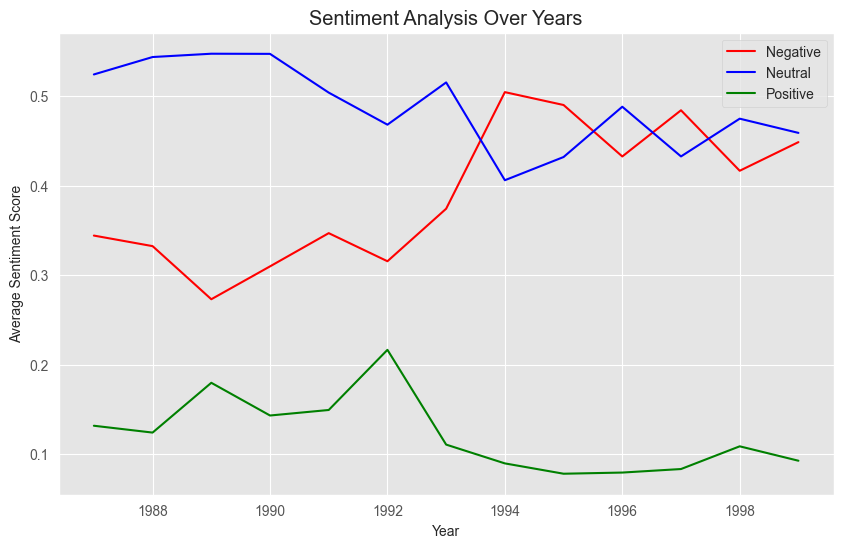

In [44]:
import matplotlib.pyplot as plt

# Load your DataFrame (df) here
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual loading method

# Assuming 'Album Release Year' is the column with the years
# Aggregate the scores for each year
aggregated_scores = east.groupby('Album Release Year').agg({
    'roberta_neg': 'mean',  # Or use 'sum' depending on the desired aggregation
    'roberta_neu': 'mean',
    'roberta_pos': 'mean'
}).reset_index()

# Now plotting the results
plt.figure(figsize=(10, 6))

# Plot each sentiment as a separate line
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_neg'], label='Negative', color='red')
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_neu'], label='Neutral', color='blue')
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_pos'], label='Positive', color='green')

# Adding titles and labels
plt.title('Sentiment Analysis Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

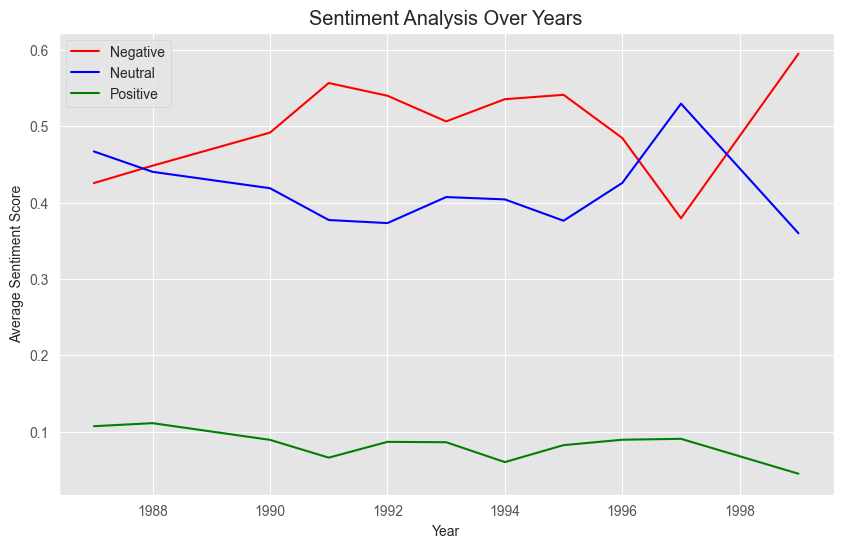

In [45]:
import matplotlib.pyplot as plt

# Load your DataFrame (df) here
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual loading method

# Assuming 'Album Release Year' is the column with the years
# Aggregate the scores for each year
aggregated_scores = west.groupby('Album Release Year').agg({
    'roberta_neg': 'mean',  # Or use 'sum' depending on the desired aggregation
    'roberta_neu': 'mean',
    'roberta_pos': 'mean'
}).reset_index()

# Now plotting the results
plt.figure(figsize=(10, 6))

# Plot each sentiment as a separate line
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_neg'], label='Negative', color='red')
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_neu'], label='Neutral', color='blue')
plt.plot(aggregated_scores['Album Release Year'], aggregated_scores['roberta_pos'], label='Positive', color='green')

# Adding titles and labels
plt.title('Sentiment Analysis Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()